#AutoEncoder(AE)

- 입력데이터의 차원축소를 통해 의미있는 잠재 공간(Latent Space/Manifold)을 학습
  - Encoder 학습을 위해 Decoder를 사용

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Load MNIST Dataset

> ## 1) X_train and X_test

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

> ## 2) Normalization and Reshape

In [4]:
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

In [5]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# II. Keras Modeling with Functional API

> ## 1) 'Latent Space' Size

In [6]:
encoding_dim = 3

> ## 2) Encoder

- Input

In [7]:
from tensorflow.keras import layers

input_img = layers.Input(shape = (784,))

- Encoding Layers and Encoding Model

In [8]:
encoded = layers.Dense(256, activation = 'elu')(input_img)
encoded = layers.Dense(128, activation = 'elu')(encoded)
encoded = layers.Dense(encoding_dim, activation = 'elu')(encoded)

> ## 3) Decoder
  
  -  Decoding Layers and Decoding Model

In [9]:
decoded = layers.Dense(128, activation = 'elu')(encoded)
decoded = layers.Dense(256, activation = 'elu')(decoded)
decoded = layers.Dense(784, activation = 'sigmoid')(decoded)

# III. AutoEncoder Model

> ## 1) 'autoencoder' Model

In [10]:
from tensorflow.keras import models

autoencoder = models.Model(input_img, decoded)

In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488

> ## 2) 'encoder' Model

In [12]:
encoder = models.Model(input_img, encoded)

In [13]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 234,243
Trainable params: 234,243
Non-trainable params: 0
_________________________________________________________________


> ## 3) 'decoder' Model

In [14]:
encoded_input = layers.Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(encoded_input, decoder_layer)

In [15]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
Total params: 235,024
Trainable params: 235,024
Non-trainable params: 0
_________________________________________________________________


# IV. Model Fit

> ## 1) Model Compile

In [16]:
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')

> ## 2) Model Training

In [17]:
%%time

autoencoder.fit(X_train, X_train,
                epochs = 60,
                batch_size = 256,
                validation_data = (X_test, X_test),
                verbose = 0)

CPU times: user 1min 18s, sys: 5.51 s, total: 1min 24s
Wall time: 1min 23s


# V. Model Predict

> ## 1) Image Encoding

- Create 'Latent Space'

In [18]:
encoded_imgs = encoder.predict(X_test, verbose = 0)

encoded_imgs.shape

(10000, 3)

> ## 2) 'Latent Space' Decoding

In [19]:
decoded_imgs = decoder.predict(encoded_imgs, verbose = 0)

decoded_imgs.shape

(10000, 784)

# VI. Visualization

> ## 1) decoder - 'decoder_imgs'

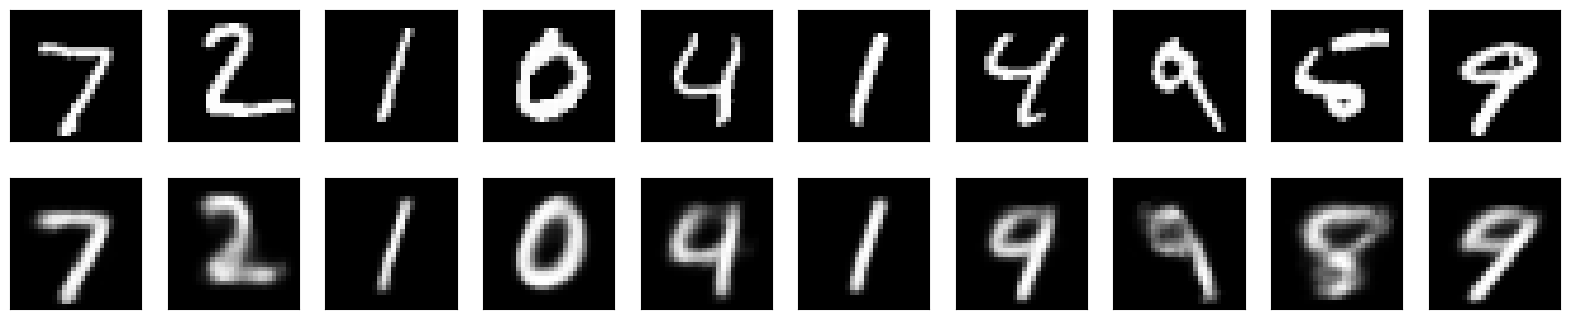

In [20]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize = (20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()